##Методические указания

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('mall_customers_clustering.csv', index_col=0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

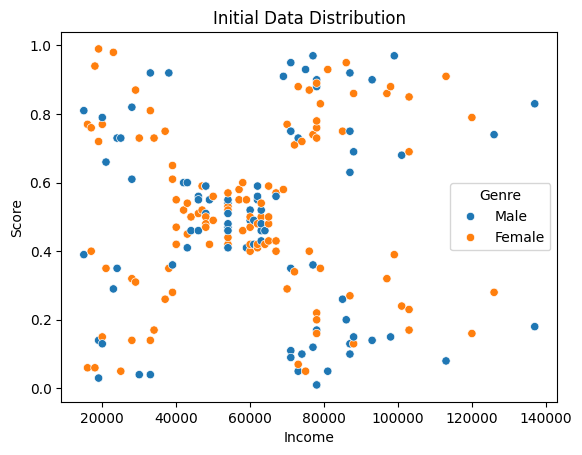

In [ ]:
sns.scatterplot(x='Income', y='Score', data=df, hue='Genre')
plt.title('Initial Data Distribution')
plt.show()

In [ ]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [ ]:
k_means = KMeans(n_clusters=3, random_state=42).fit(X)
y_kmeans = k_means.labels_


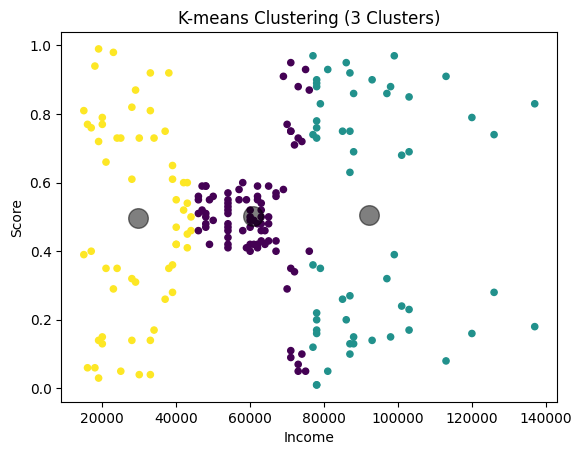

In [ ]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering (3 Clusters)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

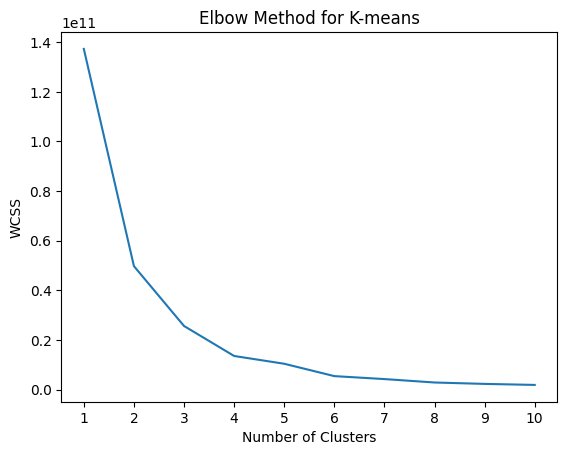

In [ ]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title('Elbow Method for K-means')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

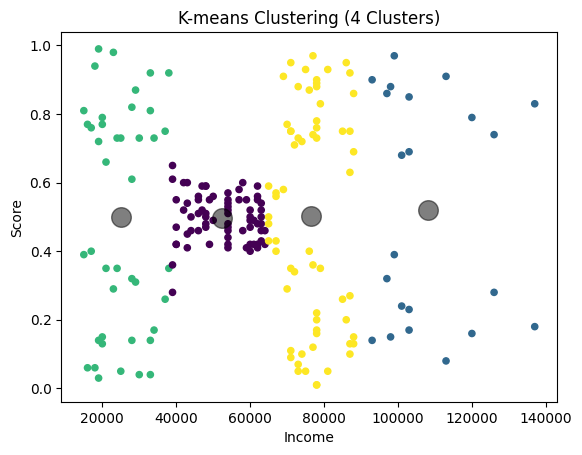

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)
y_kmeans = k_means.labels_
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering (4 Clusters)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

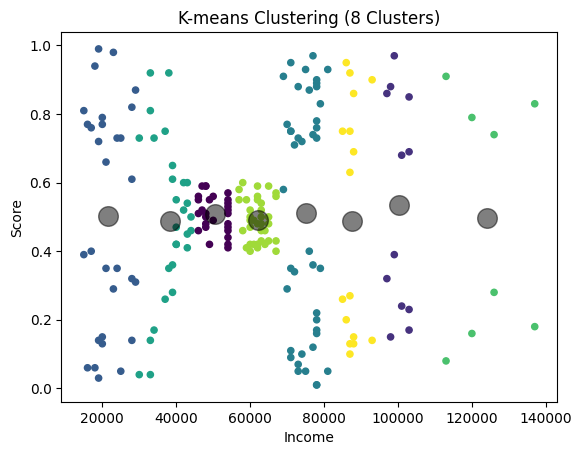

In [ ]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)
y_kmeans = k_means.labels_
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering (8 Clusters)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

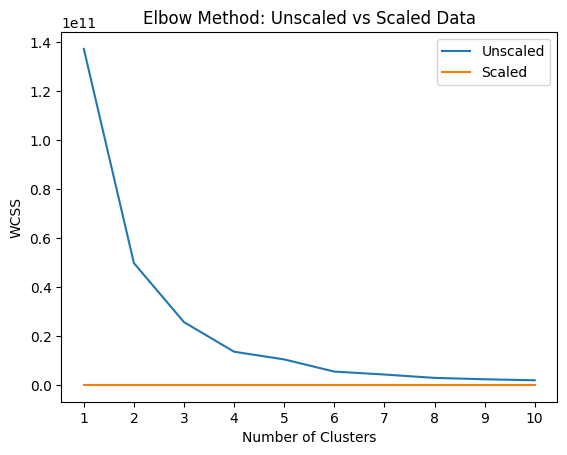

In [ ]:
unscaled, scaled = [], []
for i in range(1, 11):
    unscaled.append(KMeans(n_clusters=i, random_state=42).fit(X).inertia_)
    scaled.append(KMeans(n_clusters=i, random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1, 11), unscaled, label='Unscaled')
plt.plot(range(1, 11), scaled, label='Scaled')
plt.xticks(range(1, 11))
plt.title('Elbow Method: Unscaled vs Scaled Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()


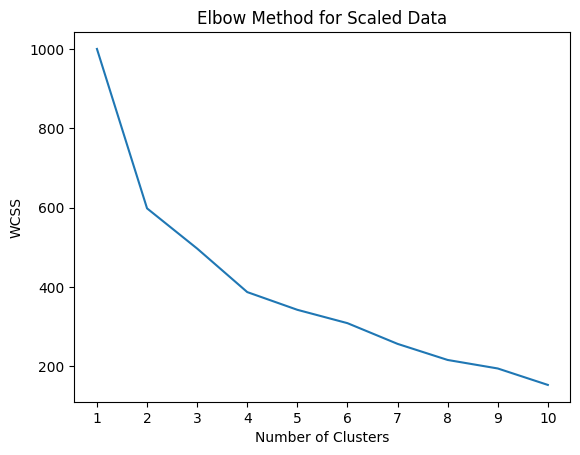

In [ ]:
wcss_scaled = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit(X_scaled)
    wcss_scaled.append(k_means.inertia_)
plt.plot(range(1, 11), wcss_scaled)
plt.xticks(range(1, 11))
plt.title('Elbow Method for Scaled Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

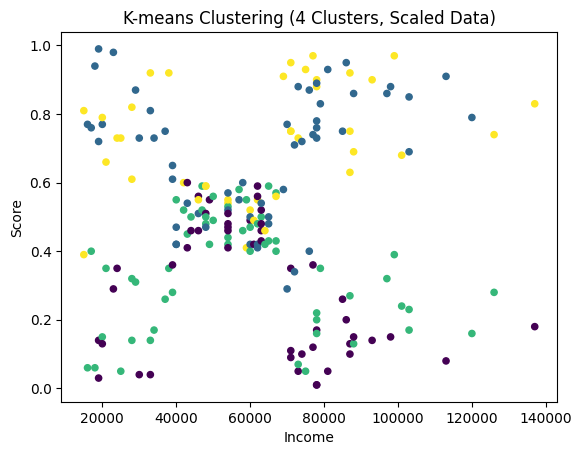

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
plt.title('K-means Clustering (4 Clusters, Scaled Data)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [ ]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
wcss_flat = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit(X_flat)
    wcss_flat.append(k_means.inertia_)
plt.plot(range(1, 11), wcss_flat)
plt.xticks(range(1, 11))
plt.title('Elbow Method for 2D Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)
y_kmeans = k_means.labels_
plt.scatter(X_flat.Income, X_flat.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering (5 Clusters, 2D Data)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X_scaled)
plt.figure(figsize=(10, 7))
plot_dendrogram(model, truncate_mode="level", p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_
plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')
plt.title('Hierarchical Clustering (5 Clusters)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_
plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')
plt.title('Hierarchical Clustering (4 Clusters, 2D Data)')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)
print(f'Number of clusters: {n_clusters_}')
print(f'Number of noise points: {n_noise_}')

##Задания для самостоятельного выполнения

###1.Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.

In [ ]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)
y_kmeans = k_means.labels_


In [ ]:
df['Cluster'] = y_kmeans

In [ ]:
for cluster in range(5):
    print(f"\nCluster {cluster}:")
    samples = df[df['Cluster'] == cluster][['Genre', 'Age', 'Income', 'Score']].head(3)
    print(samples)


Cluster 0:
     Genre  Age  Income  Score
43  Female   31   39000   0.61
46  Female   50   40000   0.55
47  Female   27   40000   0.47

Cluster 1:
      Genre  Age  Income  Score
123    Male   39   69000   0.91
125  Female   31   70000   0.77
127    Male   40   71000   0.95

Cluster 2:
    Genre  Age  Income  Score
1    Male   21   15000   0.81
3  Female   23   16000   0.77
5  Female   22   17000   0.76

Cluster 3:
      Genre  Age  Income  Score
124  Female   23   70000   0.29
128    Male   59   71000   0.11
130    Male   47   71000   0.09

Cluster 4:
    Genre  Age  Income  Score
0    Male   19   15000   0.39
2  Female   20   16000   0.06
4  Female   31   17000   0.40


In [ ]:
for i,center in enumerate(centers):
    print(f"Cluster {i}: Income={center[0]:.2f}, Score={center[1]:.2f}")

Cluster 0: Income=46.04, Score=50428.57
Cluster 1: Income=36.67, Score=100166.67
Cluster 2: Income=34.53, Score=21466.67
Cluster 3: Income=35.43, Score=75095.24
Cluster 4: Income=39.89, Score=38214.29
Cluster 5: Income=36.50, Score=124000.00
Cluster 6: Income=41.06, Score=62111.11
Cluster 7: Income=39.38, Score=87625.00


In [ ]:
import numpy as np

In [ ]:
centers_padded = np.hstack([
    np.zeros((centers.shape[0], 1)),
    centers,
    np.zeros((centers.shape[0], 2))
])
centers_original = scaler.inverse_transform(centers_padded)[:, [X.columns.get_loc('Income'), X.columns.get_loc('Score')]]
for i, center in enumerate(centers_original):
    print(f"Cluster {i}: Income={center[0]:.0f}, Score={center[1]:.2f}")

Cluster 0: Income=55296, Score=0.50
Cluster 1: Income=86538, Score=0.82
Cluster 2: Income=25727, Score=0.79
Cluster 3: Income=88200, Score=0.17
Cluster 4: Income=26304, Score=0.21


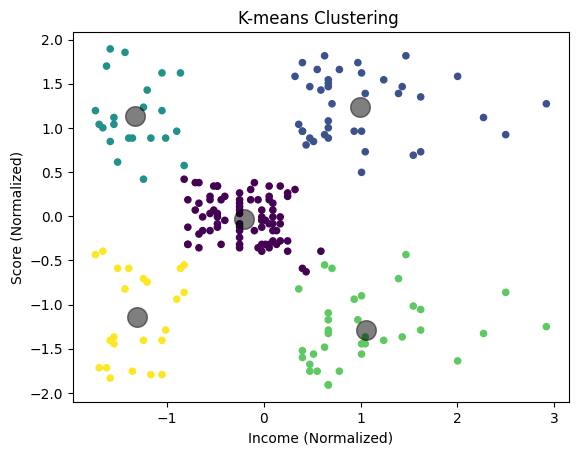

In [ ]:
plt.scatter(X_flat.Income, X_flat.Score, c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering ')
plt.xlabel('Income (Normalized)')
plt.ylabel('Score (Normalized)')
plt.show()

###2.Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков.

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_

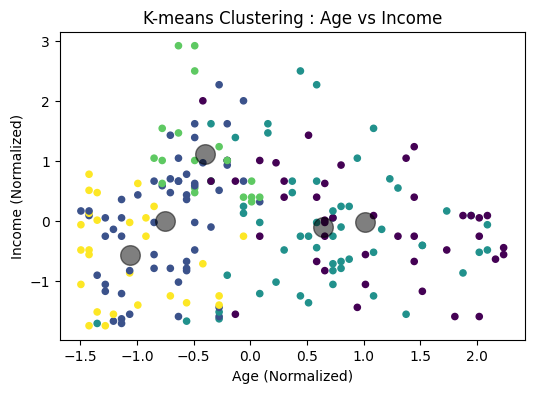

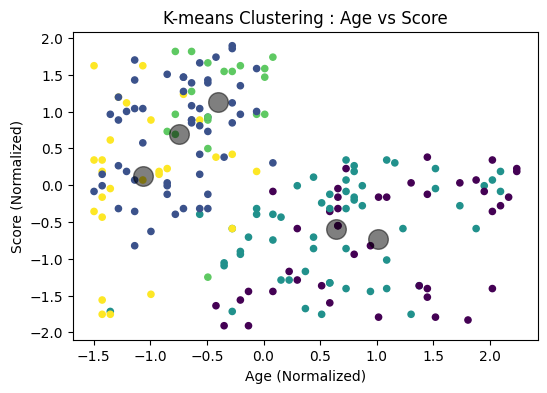

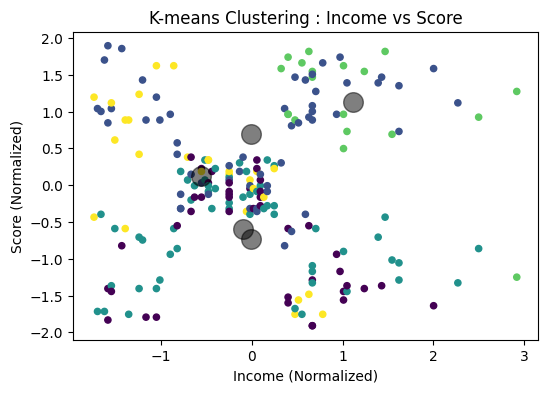

In [ ]:
feature_pairs = [('Age', 'Income'), ('Age', 'Score'), ('Income', 'Score')]
for x_axis, y_axis in feature_pairs:
    plt.figure(figsize=(6, 4))
    plt.scatter(X_scaled[x_axis], X_scaled[y_axis], c=y_kmeans, s=20, cmap='viridis')
    centers = k_means.cluster_centers_
    plt.scatter(
        centers[:, X_scaled.columns.get_loc(x_axis)],
        centers[:, X_scaled.columns.get_loc(y_axis)],
        c='black', s=200, alpha=0.5
    )
    plt.title(f'K-means Clustering : {x_axis} vs {y_axis}')
    plt.xlabel(f'{x_axis} (Normalized)')
    plt.ylabel(f'{y_axis} (Normalized)')
    plt.show()

###3.Повторите весь анализ для другого датасета - кластеризации кредитных карт.

In [ ]:
df1 = pd.read_csv('credit_card_clustering.csv', index_col=0)

In [ ]:
df1.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].replace('', np.nan)
df = df.dropna(subset=['MINIMUM_PAYMENTS'])

In [ ]:
X = df[['BALANCE', 'PURCHASES']]

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

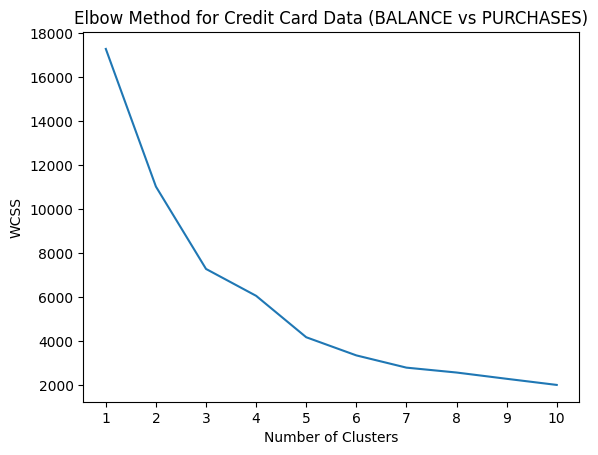

In [ ]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit(X_scaled)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title('Elbow Method for Credit Card Data (BALANCE vs PURCHASES)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

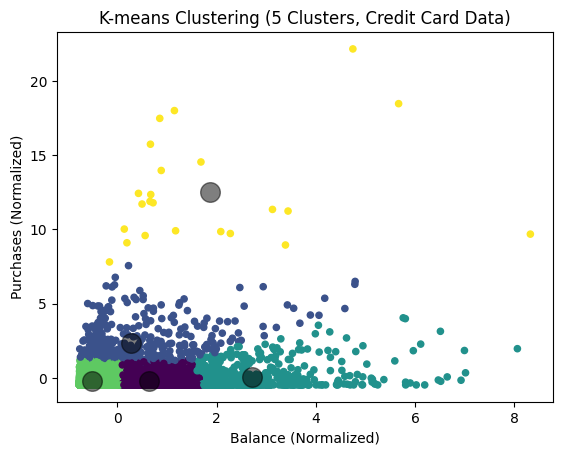

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_
plt.scatter(X_scaled.BALANCE, X_scaled.PURCHASES, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering (5 Clusters, Credit Card Data)')
plt.xlabel('Balance (Normalized)')
plt.ylabel('Purchases (Normalized)')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


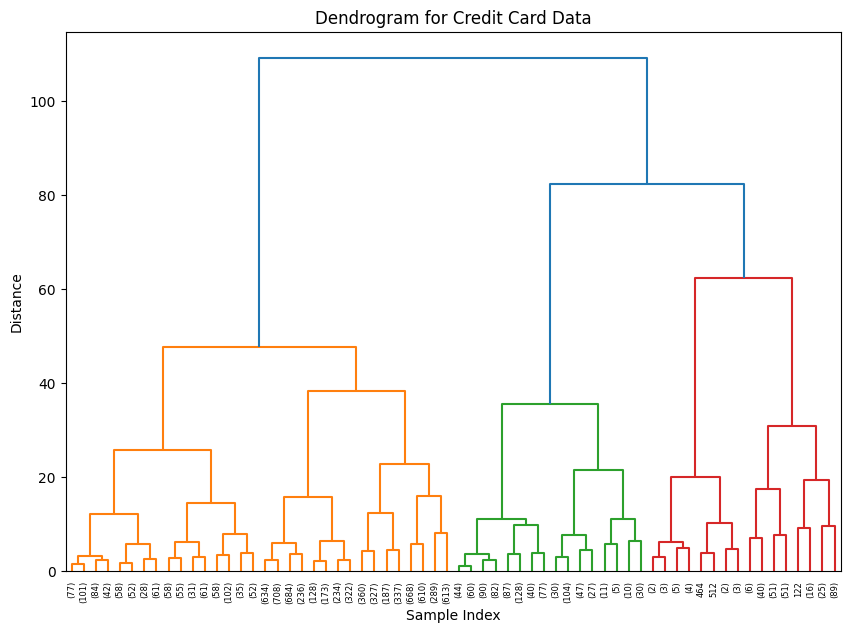

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X_scaled)
plt.figure(figsize=(10, 7))
plot_dendrogram(model, truncate_mode="level", p=5)
plt.title('Dendrogram for Credit Card Data')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

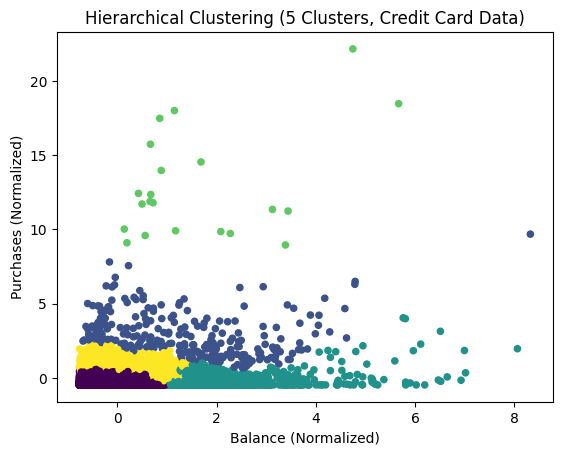

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_
plt.scatter(X_scaled.BALANCE, X_scaled.PURCHASES, c=y_agg, s=20, cmap='viridis')
plt.title('Hierarchical Clustering ')
plt.xlabel('Balance (Normalized)')
plt.ylabel('Purchases (Normalized)')
plt.show()

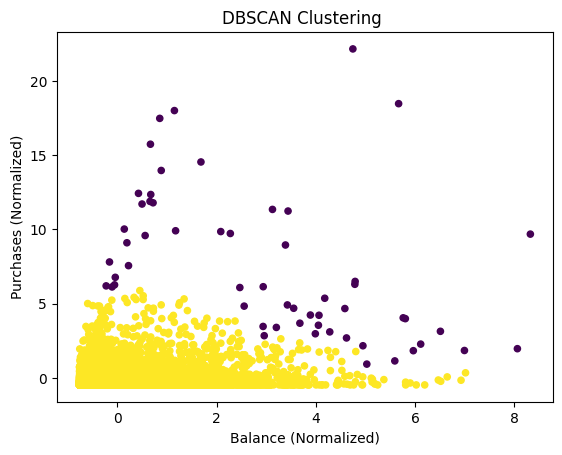

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
y_db = db.labels_
plt.scatter(X_scaled.BALANCE, X_scaled.PURCHASES, c=y_db, s=20, cmap='viridis')
plt.title('DBSCAN Clustering ')
plt.xlabel('Balance (Normalized)')
plt.ylabel('Purchases (Normalized)')
plt.show()

###4.В задании на иерархическую кластеризацию используйте разные методы расчета расстояния между кластерами. Сделайте выводы.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def plot_dendrogram(model, title, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

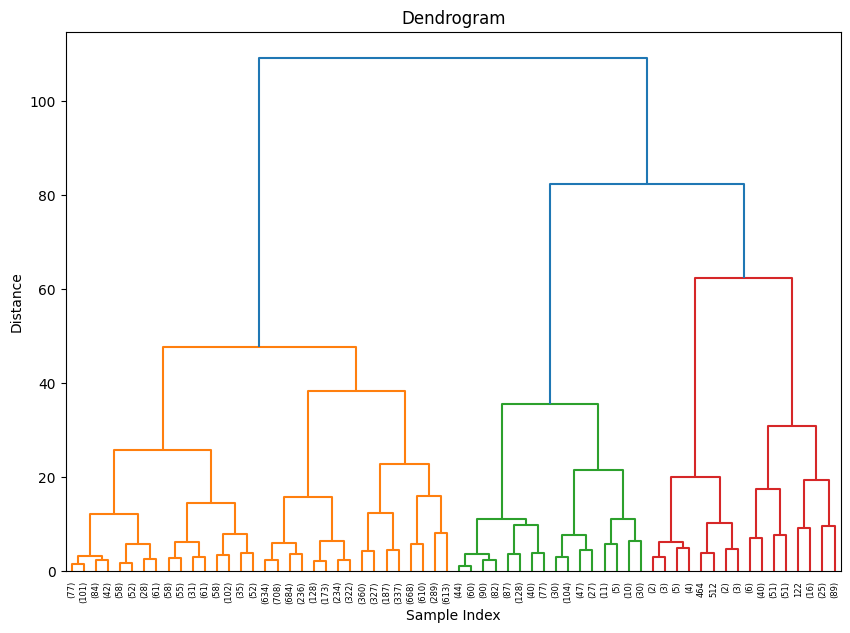

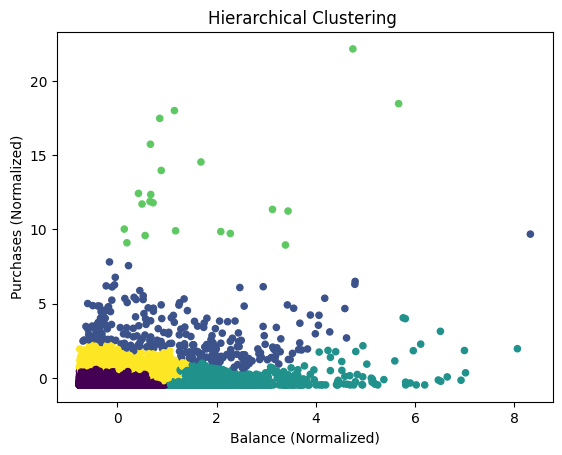

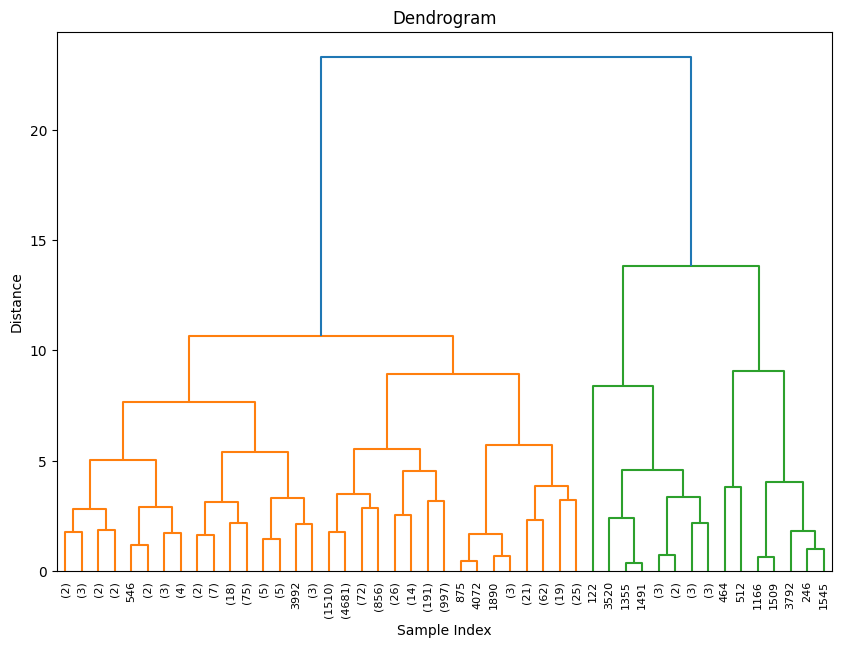

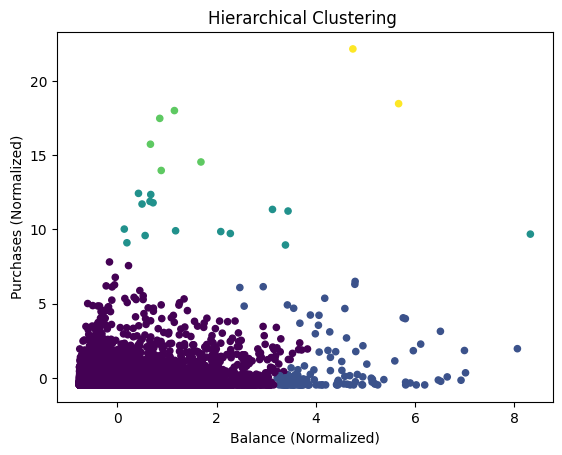

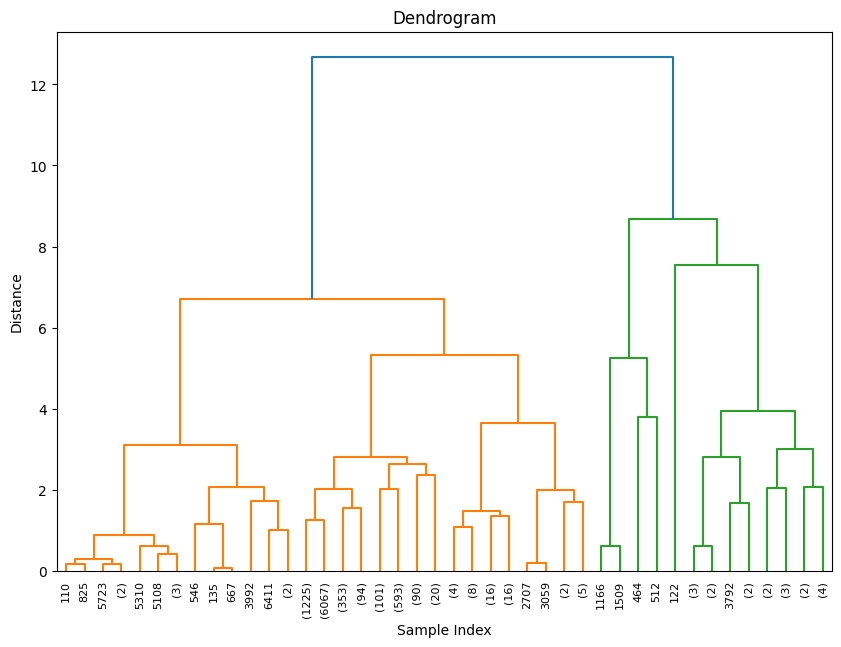

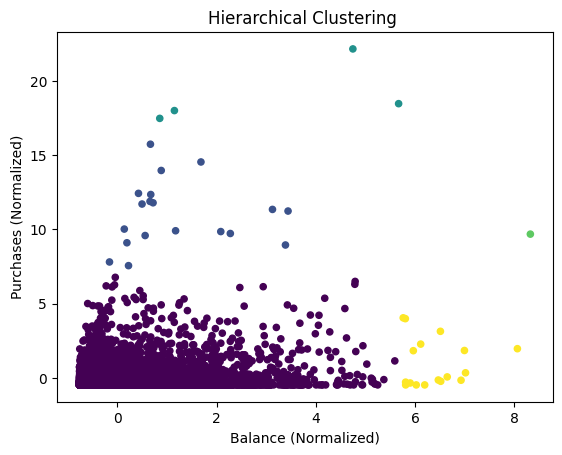

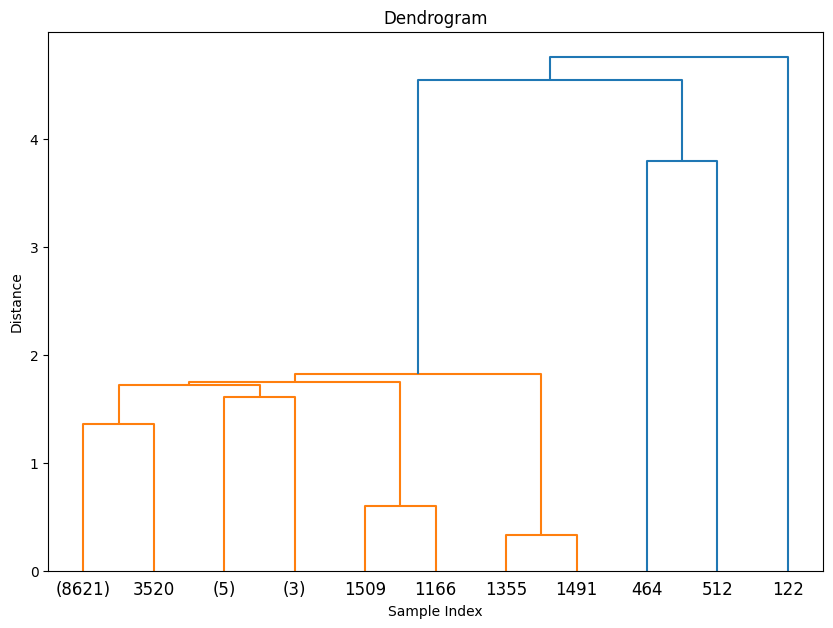

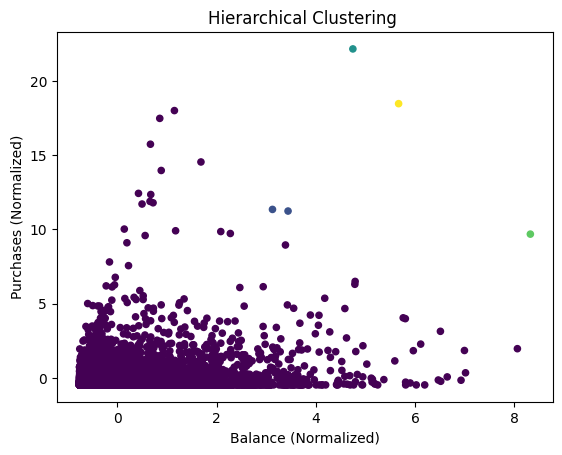

In [ ]:
linkage_methods = ['ward', 'complete', 'average', 'single']

for linkage in linkage_methods:
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=linkage).fit(X_scaled)
    plot_dendrogram(model, f'Dendrogram', truncate_mode="level", p=5)

    agg_clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage).fit(X_scaled)
    y_agg = agg_clustering.labels_
    plt.scatter(X_scaled.BALANCE, X_scaled.PURCHASES, c=y_agg, s=20, cmap='viridis')
    plt.title(f'Hierarchical Clustering ')
    plt.xlabel('Balance (Normalized)')
    plt.ylabel('Purchases (Normalized)')
    plt.show()

##Задание 5

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_
wcss_kmeans = k_means.inertia_
print(f"WCSS для K-means : {wcss_kmeans:.2f}")

In [ ]:
df['Cluster_Kmeans'] = y_kmeans

db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
y_db = db.labels_

In [ ]:
wcss_dbscan = 0.0
unique_labels = set(y_db)
for label in unique_labels:
    if label != -1:
        cluster_points = X_scaled[y_db == label].values
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            wcss_dbscan += np.sum((cluster_points - centroid) ** 2)
print(f"WCSS для DBSCAN (eps=0.5, min_samples=5): {wcss_dbscan:.2f}")

In [ ]:
df['Cluster_DBSCAN'] = y_db

In [ ]:
cluster_means_kmeans = df.groupby('Cluster_Kmeans')[['BALANCE', 'PURCHASES']].mean()
print("\nСредние значения признаков для каждого кластера (K-means):")
print(cluster_means_kmeans)


Средние значения признаков для каждого кластера (K-means):
                    BALANCE     PURCHASES
Cluster_Kmeans                           
0               2933.392917    598.435741
1               2195.512781   6117.889690
2               7286.619943   1114.390464
3                540.513280    642.143522
4               5534.647482  28137.894348


In [ ]:
cluster_means_dbscan = df[df['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN')[['BALANCE', 'PURCHASES']].mean()
print("\nСредние значения признаков для каждого кластера:")
print(cluster_means_dbscan)


Средние значения признаков для каждого кластера:
                    BALANCE   PURCHASES
Cluster_DBSCAN                         
0               1558.371656  917.299565


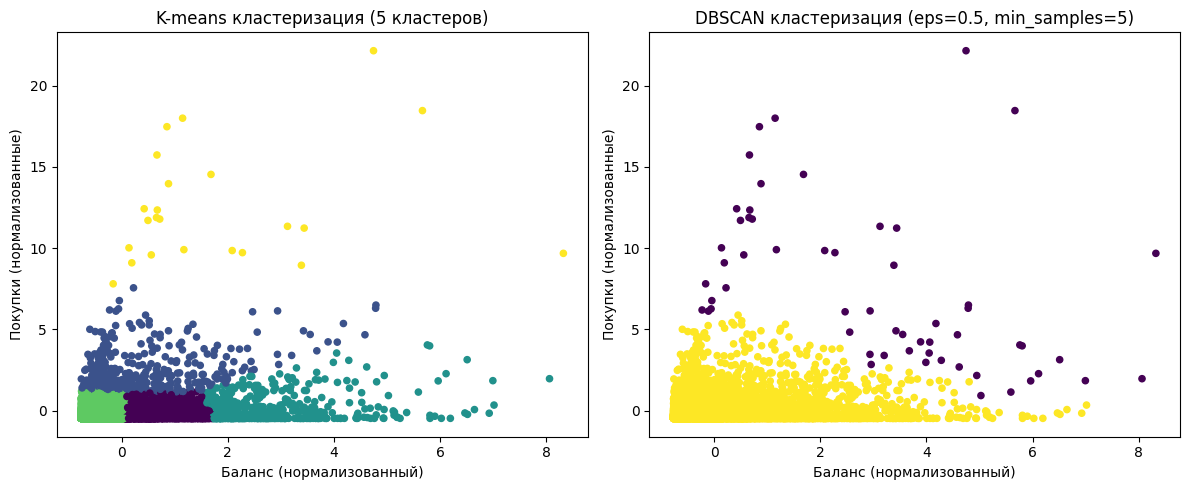

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled.BALANCE, X_scaled.PURCHASES, c=y_kmeans, s=20, cmap='viridis')
plt.title('K-means кластеризация (5 кластеров)')
plt.xlabel('Баланс (нормализованный)')
plt.ylabel('Покупки (нормализованные)')

plt.subplot(1, 2, 2)
plt.scatter(X_scaled.BALANCE, X_scaled.PURCHASES, c=y_db, s=20, cmap='viridis')
plt.title('DBSCAN кластеризация (eps=0.5, min_samples=5)')
plt.xlabel('Баланс (нормализованный)')
plt.ylabel('Покупки (нормализованные)')

plt.tight_layout()
plt.show()


In [ ]:
num_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)
print("\nСравнение результатов:")
print(f"- K-means: 5 кластеров, WCSS = {wcss_kmeans:.2f}")
print(f"- DBSCAN: {num_clusters_dbscan} кластеров, WCSS = {wcss_dbscan:.2f}")
print("Вывод: K-means даёт фиксированное число кластеров (5) с более низким WCSS, тогда как DBSCAN определяет переменное число кластеров и может включать шумовые точки, что увеличивает WCSS.")


Сравнение результатов:
- K-means: 5 кластеров, WCSS = 4176.15
- DBSCAN: 1 кластеров, WCSS = 11845.28
Вывод: K-means даёт фиксированное число кластеров (5) с более низким WCSS, тогда как DBSCAN определяет переменное число кластеров и может включать шумовые точки, что увеличивает WCSS.


##Задание 6

In [ ]:
def calculate_metrics(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    y_db = db.labels_
    unique_labels = set(y_db)
    num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    wcss = 0
    if num_clusters > 0:
        for label in unique_labels:
            if label != -1:
                cluster_points = X_scaled[y_db == label].values
                if len(cluster_points) > 0:
                    centroid = np.mean(cluster_points, axis=0)
                    wcss += np.sum((cluster_points - centroid) ** 2)
    else:
        wcss = np.inf
    return wcss, num_clusters

In [ ]:
eps_values = np.arange(0.1, 1.6, 0.1)
min_samples_values = range(2, 21, 2)

In [ ]:
wcss_matrix = np.zeros((len(eps_values), len(min_samples_values)))
clusters_matrix = np.zeros((len(eps_values), len(min_samples_values)))

In [ ]:
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        wcss, num_clusters = calculate_metrics(X_scaled, eps, min_samples)
        wcss_matrix[i, j] = wcss
        clusters_matrix[i, j] = num_clusters

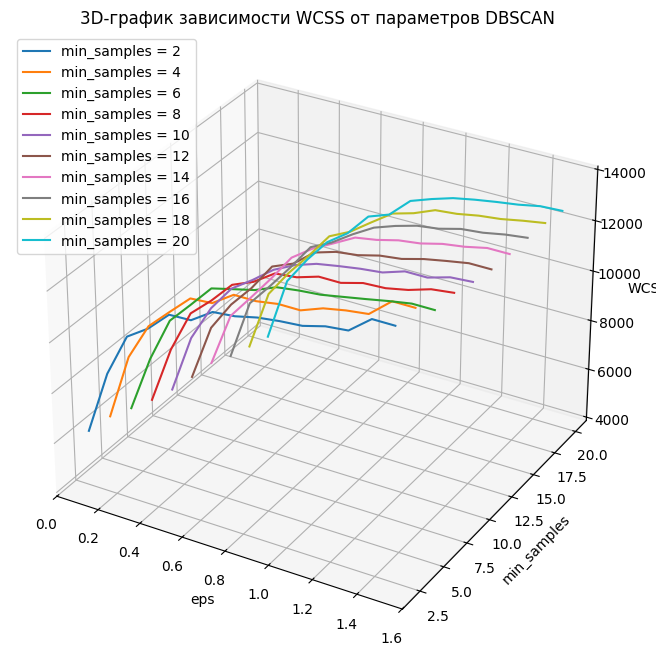

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for j in range(len(min_samples_values)):
    ax.plot(eps_values, [min_samples_values[j]] * len(eps_values), wcss_matrix[:, j], label=f'min_samples = {min_samples_values[j]}')
ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
ax.set_zlabel('WCSS')
ax.set_title('3D-график зависимости WCSS от параметров DBSCAN')
plt.legend()
plt.show()

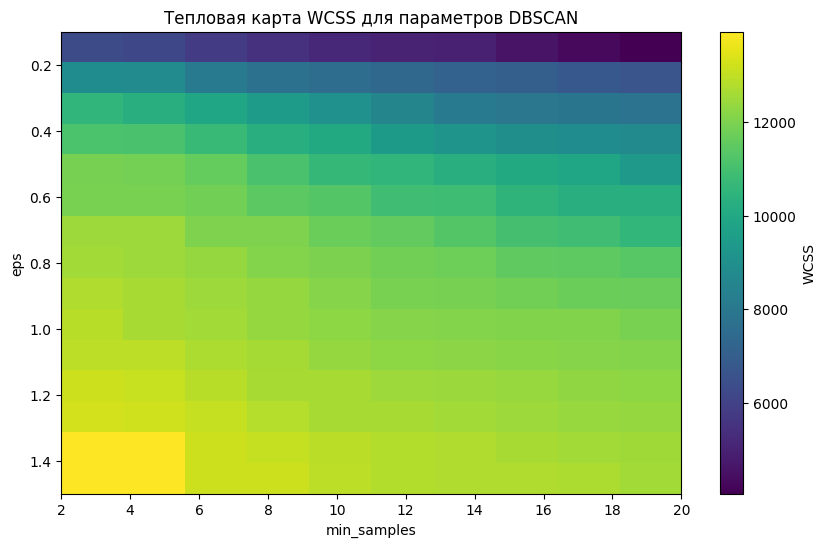

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(wcss_matrix, aspect='auto', cmap='viridis', extent=[min_samples_values[0], min_samples_values[-1], eps_values[-1], eps_values[0]])
plt.colorbar(label='WCSS')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Тепловая карта WCSS для параметров DBSCAN')
plt.show()

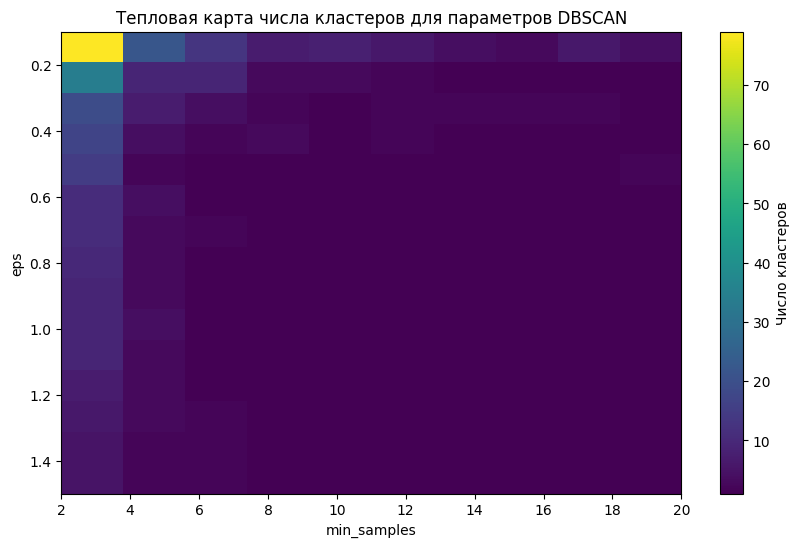

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(clusters_matrix, aspect='auto', cmap='viridis', extent=[min_samples_values[0], min_samples_values[-1], eps_values[-1], eps_values[0]])
plt.colorbar(label='Число кластеров')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Тепловая карта числа кластеров для параметров DBSCAN')
plt.show()